In [1]:
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
print('Setup Complete')

Setup Complete


In [2]:
data = pd.read_csv('us_covid_clean_data_finalv2.csv')
data.head()

,Active,Active_by_pop,Confirmed,County,Date,Death_per_1000pop,Deaths,FIPS,Infection_Rate,Land Area,Lat,Long,Mortality_Rate,Population,Recovered,State,Pop_density,Active_case_per_pop_per_area,Active_per1000pop,Recovered_per_1000_pop
0,955.0,0.017094,1624,Autauga,9/17/20,0.429576,24,1001.0,1.709356,1565.630666,32.539527,-86.644082,1.477833,55869,645.0,Alabama,35.684661,26.762199,17.093558,11.544864
1,2978.0,0.013340,5021,Baldwin,9/17/20,0.215021,48,1003.0,1.334026,5250.142450,30.727750,-87.722071,0.955985,223234,1995.0,Alabama,42.519608,70.038275,13.340262,8.936811
2,481.0,0.019485,809,Barbour,9/17/20,0.283562,7,1005.0,1.948473,2342.890443,31.868263,-85.387129,0.865266,24686,321.0,Alabama,10.536558,45.650583,19.484728,13.003322
3,363.0,0.016210,617,Bibb,9/17/20,0.401893,9,1007.0,1.620970,1620.046620,32.996421,-87.125115,1.458671,22394,245.0,Alabama,13.823059,26.260468,16.209699,10.940430
4,893.0,0.015443,1504,Blount,9/17/20,0.224812,13,1009.0,1.544288,1685.185185,33.982109,-86.567906,0.864362,57826,598.0,Alabama,34.314330,26.024113,15.442880,10.341369


In [3]:
moving_average = pd.read_csv('us_moving_avg.csv')
moving_average = moving_average.rename(columns = {'Confirmed':'Average_14days'})

In [4]:
df = data.merge(moving_average,how = 'left',left_on = ['State','County'],right_on = ['state','county'])
df.shape

(3130, 23)

In [5]:
df.head()

,Active,Active_by_pop,Confirmed,County,Date,Death_per_1000pop,Deaths,FIPS,Infection_Rate,Land Area,...,Population,Recovered,State,Pop_density,Active_case_per_pop_per_area,Active_per1000pop,Recovered_per_1000_pop,state,county,average
0,955.0,0.017094,1624,Autauga,9/17/20,0.429576,24,1001.0,1.709356,1565.630666,...,55869,645.0,Alabama,35.684661,26.762199,17.093558,11.544864,Alabama,Autauga,19.642857
1,2978.0,0.013340,5021,Baldwin,9/17/20,0.215021,48,1003.0,1.334026,5250.142450,...,223234,1995.0,Alabama,42.519608,70.038275,13.340262,8.936811,Alabama,Baldwin,37.571429
2,481.0,0.019485,809,Barbour,9/17/20,0.283562,7,1005.0,1.948473,2342.890443,...,24686,321.0,Alabama,10.536558,45.650583,19.484728,13.003322,Alabama,Barbour,13.928571
3,363.0,0.016210,617,Bibb,9/17/20,0.401893,9,1007.0,1.620970,1620.046620,...,22394,245.0,Alabama,13.823059,26.260468,16.209699,10.940430,Alabama,Bibb,5.357143
4,893.0,0.015443,1504,Blount,9/17/20,0.224812,13,1009.0,1.544288,1685.185185,...,57826,598.0,Alabama,34.314330,26.024113,15.442880,10.341369,Alabama,Blount,33.357143


In [6]:
df.isna().sum()

Active                           0
Active_by_pop                    0
Confirmed                        0
County                           0
Date                             0
Death_per_1000pop                0
Deaths                           0
FIPS                             0
Infection_Rate                   0
Land Area                        0
Lat                              0
Long                             0
Mortality_Rate                  38
Population                       0
Recovered                        0
State                            0
Pop_density                      0
Active_case_per_pop_per_area     0
Active_per1000pop                0
Recovered_per_1000_pop           0
state                            0
county                           0
average                          0
dtype: int64

In [7]:
df[df['average']<0] = 0

In [8]:
cluster_df = df[['Active_per1000pop','Pop_density','average']]

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)
scaled_data = pd.DataFrame(scaled_data,columns=cluster_df.columns)
scaled_data.head()

,Active_per1000pop,Pop_density,average
0,1.285717,-0.101190,0.213237
1,0.821808,-0.087072,0.709582
2,1.581267,-0.153133,0.055040
3,1.176472,-0.146345,-0.182256
4,1.081693,-0.104020,0.592911


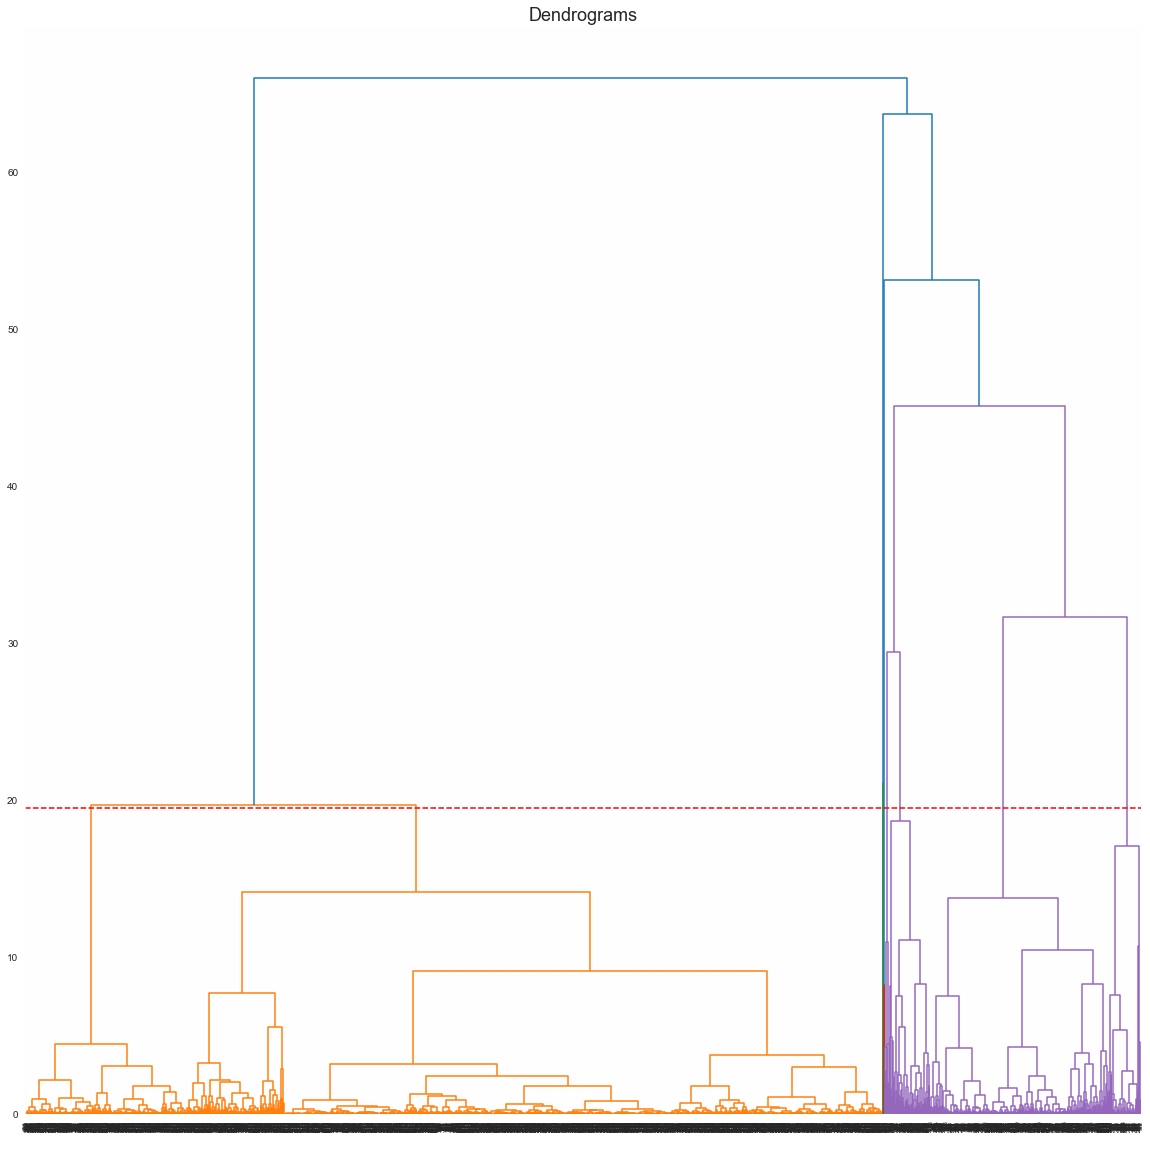

In [52]:
#sns.set_style('darkgrid')
plt.figure(figsize=(20, 20))  
plt.title("Dendrograms",fontsize=18)
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'),orientation='top')
plt.axhline(y=19.5, color='r', linestyle='--')
plt.xlabel(' ')
plt.show()

In [11]:
for i in range(2,10):
    cluster = AgglomerativeClustering(n_clusters=i,linkage='ward').fit(scaled_data)
    labels = cluster.labels_
    score = silhouette_score(scaled_data,labels)
    print('Silhoutte Score for {} clusters is : {}'.format(i,score))

Silhoutte Score for 2 clusters is : 0.6060115658716698
Silhoutte Score for 3 clusters is : 0.609017172843021
Silhoutte Score for 4 clusters is : 0.6116831822949296
Silhoutte Score for 5 clusters is : 0.6290030110546849
Silhoutte Score for 6 clusters is : 0.6021662488909656
Silhoutte Score for 7 clusters is : 0.6088687791801909
Silhoutte Score for 8 clusters is : 0.6090872151521146
Silhoutte Score for 9 clusters is : 0.43892498174089584


In [10]:
cluster = AgglomerativeClustering(n_clusters=5,linkage='ward').fit(scaled_data)
cluster

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [11]:
labels = cluster.labels_
score = silhouette_score(scaled_data,labels)
df['Cluster_labels'] = labels

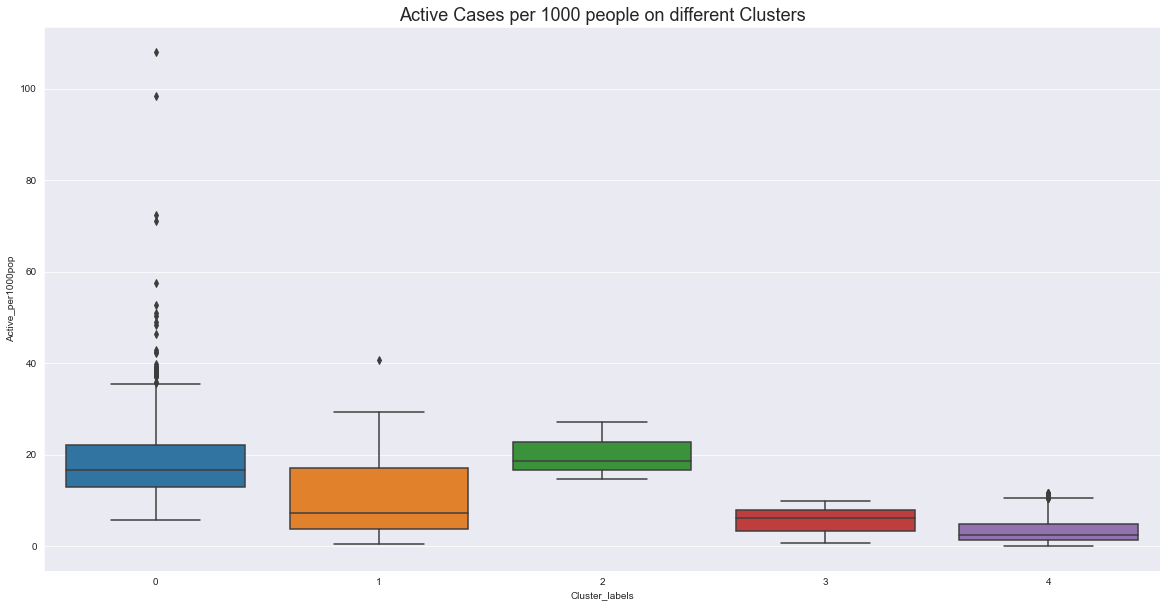

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(x = df['Cluster_labels'], y = df['Active_per1000pop'])
plt.title('Active Cases per 1000 people on different Clusters',fontsize=18)
plt.savefig('active_cluster.png');

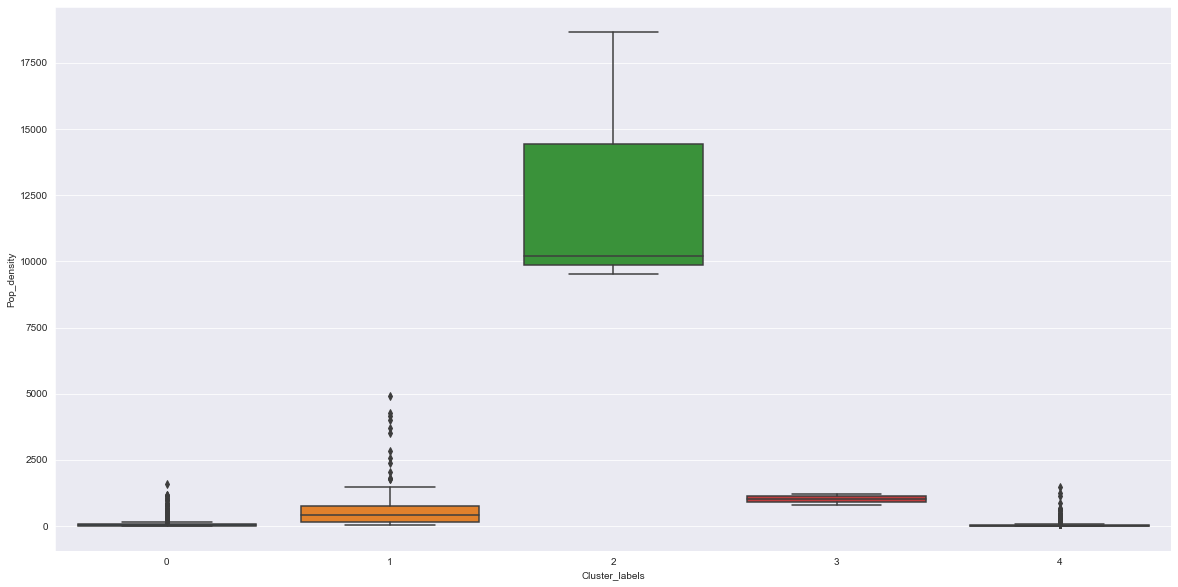

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(x = df['Cluster_labels'], y = df['Pop_density'])

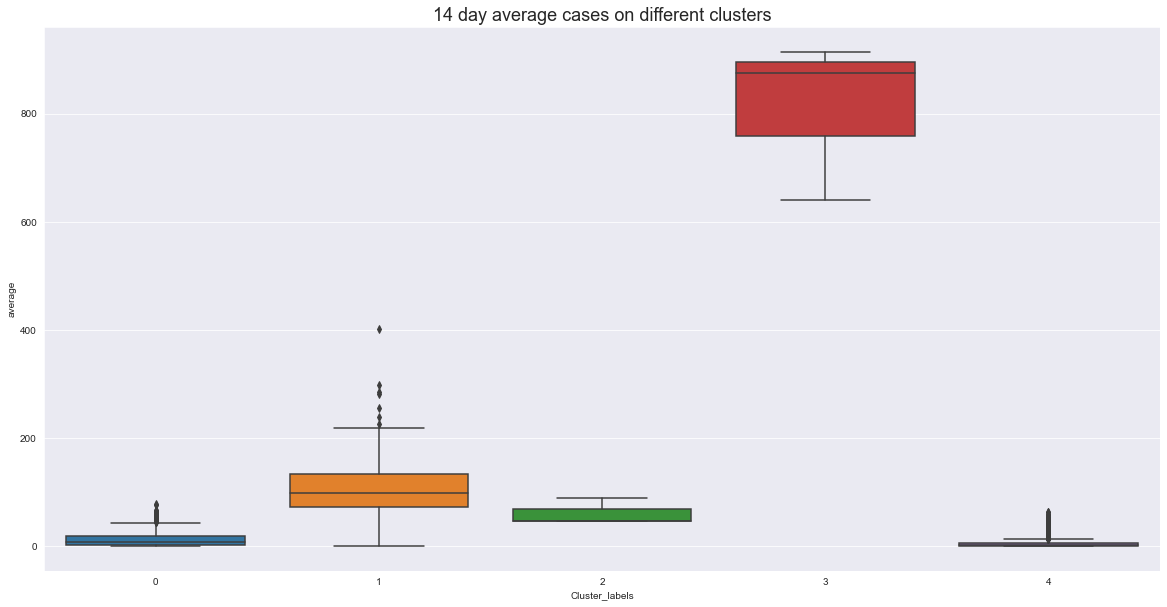

In [49]:
plt.figure(figsize=(20,10))
sns.boxplot(x = df['Cluster_labels'], y = df['average'])
plt.title('14 day average cases on different clusters',fontsize=18)
plt.savefig('averge_clusters.png');

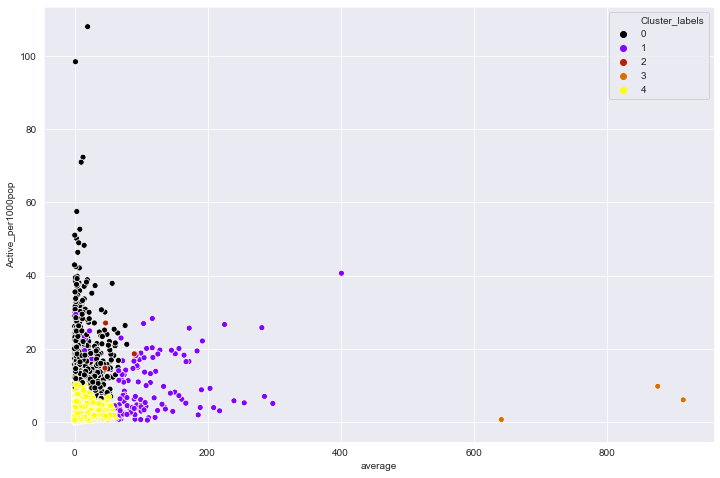

In [50]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.scatterplot(x = 'average',y = 'Active_per1000pop',hue = 'Cluster_labels', data = df,palette='gnuplot',legend="full");

In [23]:
df[(df['Cluster_labels']==0) | (df['Cluster_labels']==1)]['Population'].sum()

173144190

In [14]:
df.groupby('Cluster_labels',as_index=0)['Population'].sum()

,Cluster_labels,Population
0,0,59473755
1,1,113670435
2,2,5606816
3,3,19902665
4,4,127277229


In [ ]:
df.to_csv('covid_resuls_v1.csv',index=False)

In [ ]:
def plot_scatterplot_map(df,long,lat,text,sizes,values,color_bar_title,title):
    figure = go.Figure(data=go.Scattergeo(
        lon = long,
        lat = lat,
        text = text,
        mode = 'markers',
        marker_color = values,
        marker = dict(
            size = values/sizes,
            opacity = 0.7,
            reversescale = False,
            autocolorscale = False,
            line = dict(
                width=1,
                color='rgba(10, 12, 12)'
            ),colorscale = 'Reds',
            cmin = 0,
            sizemode = 'area',
            color = values,
            cmax = values.max(),
            colorbar_title = color_bar_title
        )
        
        ))
    figure.update_layout(
            title = title,
            geo = dict(
                scope = 'usa',
                projection_type = 'albers usa',
                showland = True,
                landcolor = 'rgb(10, 150, 150)',
            ))
    return figure.show()

In [ ]:
df.columns

In [ ]:
df['FIPS'] = df['FIPS'].astype(int).astype(str)
for fips in df['FIPS']:
    df.loc[df['FIPS'].str.startswith('6')]['FIPS'] = '0' + fips
    
    

In [ ]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode = True
#df['text'] = df['County'] + ' ' + 'Active Cases per 1000 population: ' + df['Active_per1000pop'].astype(str)
figure = go.Figure(data=go.Scattergeo(
        lon = df['Long'],
        lat = df['Lat'],
        #text = df['text'],
        mode = 'markers',
        marker_color = df['Cluster_labels'],
        marker = dict(
            size = df['Active_per1000pop']/0.5,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            line = dict(
                width=1,
                color='rgba(10, 12, 12)'
            ),colorscale = 'Blues',
            cmin = 0,
            sizemode = 'area',
            color = df['Cluster_labels'],
            #cmax = df['Active_per1000pop'].max(),
            #colorbar_title = 'Active Cases'
        )
        
        ))
figure.update_layout(
        title = 'COVID-19 Clusters',
        geo = dict(
            scope = 'usa',
            projection_type = 'albers usa',
            showland = True,
            landcolor = 'rgb(10, 150, 150)',
        ))
figure.show()

In [ ]:
# df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0),(1),(2),(3),(4)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 0.5

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['Long'],
        lat = df_sub['Lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['Active_per1000pop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

In [ ]:
data = df[['County','State','FIPS','Lat','Long','Active_per1000pop','Pop_density','average','Cluster_labels']]
data.head()

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Cluster_labels',y = 'Active_per1000pop',data = data);

In [ ]:
import folium
latitude = 38.500000
longitude = -95.665

map_USA = folium.Map(location=[latitude, longitude], zoom_start=4)

map_USA

In [ ]:
occurences = folium.map.FeatureGroup()
n_mean = data['Active_per1000pop'].mean()

for lat, lng, cluster, county, state in zip(data['Lat'], data['Long'],  
                                            data['Cluster_labels'],
                                         data['County'],
                                         data['State'],):
    occurences.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            #radius=number/n_mean*5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            tooltip = str(cluster)+','+str(county) +','+ str(state)
        )
    )

map_USA.add_child(occurences)

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

latitude = 38.500000
longitude = -95.665

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, cluster, county, state in zip(data['Lat'], data['Long'],  
                                            data['Cluster_labels'],
                                         data['County'],
                                         data['State']):
    #label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        tooltip = str(county)+ ','+str(state) + '- Cluster ' + str(cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [ ]:
from urllib.request import urlopen
import plotly.express as px
import json
# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
#     counties = json.load(response)

# fig = px.choropleth(data, geojson=counties, locations='FIPS', color='Cluster_labels',
#                       color_continuous_scale="Viridis",
#                       range_color=(0, 4),
#                        scope="usa",
#                        labels={'Clutser':'Cluster_labels'}
#                       )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

data['FIPS'] = data['FIPS'].astype(int).astype(str)

fig = px.choropleth(data, geojson=counties, locations='FIPS', color='Cluster_labels',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)


df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})



fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
df['FIPS'] = df['FIPS'].astype(int).astype(str)
fig = px.choropleth(df, geojson=counties, locations='FIPS', color='Cluster_labels',
                  color_continuous_scale="Viridis",
                  range_color=(0, 4),
                   scope="usa",
                   labels={'Clutser':'Cluster_labels'}
                  )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})